<a href="https://colab.research.google.com/github/MariaKitty/practic/blob/main/practic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импортируем библиотеки и загружаем датасет.

In [ ]:
import pandas as pd
import numpy as np
db = pd.read_csv('/content/sample_data/Cost_of_Living_Index_by_Country_2024.csv')

Вывод первых трех строк:

In [ ]:
db.head(3)

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3


Вывод последних трех строк:

In [ ]:
db.tail(3)

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
118,119,Egypt,21.0,3.7,12.7,21.2,16.2,20.0
119,120,Libya,20.4,4.3,12.7,22.2,15.2,42.0
120,121,Pakistan,18.8,2.8,11.1,17.5,12.9,29.1


Случайная выборка строк:

In [ ]:
db.sample(3)

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
69,70,Turkey,37.4,13.2,25.8,37.6,30.7,49.0
68,69,Romania,37.5,9.9,24.2,36.6,35.5,63.8
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7


Атрибуты датасета:

In [ ]:
db.columns.tolist()

['Rank',
 'Country',
 'Cost of Living Index',
 'Rent Index',
 'Cost of Living Plus Rent Index',
 'Groceries Index',
 'Restaurant Price Index',
 'Local Purchasing Power Index']

Информация о датасете и использование памяти:

In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            121 non-null    int64  
 1   Country                         121 non-null    object 
 2   Cost of Living Index            121 non-null    float64
 3   Rent Index                      121 non-null    float64
 4   Cost of Living Plus Rent Index  121 non-null    float64
 5   Groceries Index                 121 non-null    float64
 6   Restaurant Price Index          121 non-null    float64
 7   Local Purchasing Power Index    121 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 7.7+ KB


Количество ненулевых значений (здесь понятно, что датасет содержит все ненулевые значения):

In [ ]:
np.count_nonzero(db)

968

Отображение датасета:

In [ ]:
db

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5
...,...,...,...,...,...,...,...,...
116,117,Bangladesh,22.5,2.4,12.8,25.7,12.8,33.1
117,118,India,21.2,5.6,13.7,23.8,15.1,82.6
118,119,Egypt,21.0,3.7,12.7,21.2,16.2,20.0
119,120,Libya,20.4,4.3,12.7,22.2,15.2,42.0


Приведем все столбцы к нижнему регистру:

In [ ]:
db_rename = db.rename(columns={'Rank': 'rank', 'Country': 'country', 'Cost of Living Index': 'cost_of_living_index',
                               'Rent Index': 'rent_index', 'Cost of Living Plus Rent Index': 'cost_of_living_plus_rent_index',
                               'Groceries Index': 'groceries_index', 'Restaurant Price Index': 'restaurant_price_index',
                               'Local Purchasing Power Index': 'local_purchasing_power_index'})

Изменим тип данных столбца "country", так как потребуется индексировать потом датасет по этому столбцу:

In [ ]:
db_new = db_rename.convert_dtypes()
db_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   rank                            121 non-null    Int64  
 1   country                         121 non-null    string 
 2   cost_of_living_index            121 non-null    Float64
 3   rent_index                      121 non-null    Float64
 4   cost_of_living_plus_rent_index  121 non-null    Float64
 5   groceries_index                 121 non-null    Float64
 6   restaurant_price_index          121 non-null    Float64
 7   local_purchasing_power_index    121 non-null    Float64
dtypes: Float64(6), Int64(1), string(1)
memory usage: 8.5 KB


Проверим датасет на наличие пропусков:

In [ ]:
db_new.isnull().sum()

,0
rank,0
country,0
cost_of_living_index,0
rent_index,0
cost_of_living_plus_rent_index,0
groceries_index,0
restaurant_price_index,0
local_purchasing_power_index,0


Проверим датасет на наличие дубликатов:

In [ ]:
int(db_new.duplicated().sum())

0

Индексация по координаторам:

In [ ]:
db_new.loc[:3]

,rank,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1


In [ ]:
db_new.loc[56:]

,rank,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
56,57,Jordan,41.2,7.2,24.9,37.1,34.8,45.5
57,58,Armenia,41.0,19.0,30.5,36.0,38.9,38.5
58,59,Poland,40.8,17.1,29.5,36.8,35.0,85.8
59,60,Mexico,40.2,15.5,28.4,43.4,35.7,45.4
60,61,El Salvador,39.5,14.6,27.6,43.4,29.6,31.9
...,...,...,...,...,...,...,...,...
116,117,Bangladesh,22.5,2.4,12.8,25.7,12.8,33.1
117,118,India,21.2,5.6,13.7,23.8,15.1,82.6
118,119,Egypt,21.0,3.7,12.7,21.2,16.2,20.0
119,120,Libya,20.4,4.3,12.7,22.2,15.2,42.0


In [ ]:
db_new.loc[35:37]

,rank,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
35,36,Estonia,52.0,15.0,34.2,46.4,50.6,80.4
36,37,Qatar,51.3,36.1,44.0,43.9,47.2,161.1
37,38,Slovenia,49.9,18.7,34.9,49.0,43.4,80.9


In [ ]:
db_new.loc[12, 'country']

'New Zealand'

In [ ]:
db_new.loc[:,'rank':'rent_index']

,rank,country,cost_of_living_index,rent_index
0,1,Switzerland,101.1,46.5
1,2,Bahamas,85.0,36.7
2,3,Iceland,83.0,39.2
3,4,Singapore,76.7,67.2
4,5,Barbados,76.6,19.0
...,...,...,...,...
116,117,Bangladesh,22.5,2.4
117,118,India,21.2,5.6
118,119,Egypt,21.0,3.7
119,120,Libya,20.4,4.3


Логическая индексация:

In [ ]:
db_new.loc[db_new['cost_of_living_index']>50]

,rank,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5
5,6,Norway,76.0,26.2,52.1,79.0,73.5,114.7
6,7,Denmark,72.3,26.4,50.2,64.8,81.3,127.2
7,8,Hong Kong (China),70.8,59.4,65.3,84.6,46.2,109.3
8,9,United States,70.4,41.7,56.6,75.0,67.2,142.3
9,10,Australia,70.2,33.4,52.5,77.3,62.5,127.4


In [ ]:
db_new.loc[(db_new['groceries_index']>70) & (db_new['rank']>20)]

,rank,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
23,24,South Korea,60.1,16.0,38.9,81.4,31.4,109.4


In [ ]:
db_new.loc[(db_new['restaurant_price_index']<90) & (db_new['restaurant_price_index']>70)]

,rank,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
5,6,Norway,76.0,26.2,52.1,79.0,73.5,114.7
6,7,Denmark,72.3,26.4,50.2,64.8,81.3,127.2


In [ ]:
db_new.loc[(db_new['restaurant_price_index'] < 40) | (db_new['cost_of_living_plus_rent_index'] < 50)]

,rank,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5
10,11,Austria,65.1,22.5,44.7,66.4,59.3,102.4
11,12,Canada,64.8,33.2,49.6,71.2,61.7,103.7
12,13,New Zealand,64.6,25.9,46.0,71.9,57.1,121.0
14,15,France,63.7,21.0,43.2,69.5,56.3,102.4
...,...,...,...,...,...,...,...,...
116,117,Bangladesh,22.5,2.4,12.8,25.7,12.8,33.1
117,118,India,21.2,5.6,13.7,23.8,15.1,82.6
118,119,Egypt,21.0,3.7,12.7,21.2,16.2,20.0
119,120,Libya,20.4,4.3,12.7,22.2,15.2,42.0


In [ ]:
db_new.loc[db_new['country'] == 'Russia']

,rank,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
88,89,Russia,31.0,10.0,20.9,28.8,28.0,50.6


Сортировка данных:

In [ ]:
db_new.sort_values('cost_of_living_index', ascending=False)

,rank,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5
...,...,...,...,...,...,...,...,...
116,117,Bangladesh,22.5,2.4,12.8,25.7,12.8,33.1
117,118,India,21.2,5.6,13.7,23.8,15.1,82.6
118,119,Egypt,21.0,3.7,12.7,21.2,16.2,20.0
119,120,Libya,20.4,4.3,12.7,22.2,15.2,42.0


In [ ]:
db_new.sort_values('rent_index', ascending=True)

,rank,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
116,117,Bangladesh,22.5,2.4,12.8,25.7,12.8,33.1
120,121,Pakistan,18.8,2.8,11.1,17.5,12.9,29.1
111,112,Nepal,25.5,3.5,15.0,25.6,16.2,25.4
118,119,Egypt,21.0,3.7,12.7,21.2,16.2,20.0
114,115,Syria,24.0,3.7,14.2,24.5,15.3,5.5
...,...,...,...,...,...,...,...,...
8,9,United States,70.4,41.7,56.6,75.0,67.2,142.3
13,14,Ireland,64.4,42.3,53.8,59.3,65.3,101.1
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
7,8,Hong Kong (China),70.8,59.4,65.3,84.6,46.2,109.3


In [ ]:
db_new.sort_values('cost_of_living_plus_rent_index', ascending=False)

,rank,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
7,8,Hong Kong (China),70.8,59.4,65.3,84.6,46.2,109.3
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
...,...,...,...,...,...,...,...,...
117,118,India,21.2,5.6,13.7,23.8,15.1,82.6
116,117,Bangladesh,22.5,2.4,12.8,25.7,12.8,33.1
118,119,Egypt,21.0,3.7,12.7,21.2,16.2,20.0
119,120,Libya,20.4,4.3,12.7,22.2,15.2,42.0


In [ ]:
db_new.sort_values('groceries_index', ascending=False)

,rank,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
7,8,Hong Kong (China),70.8,59.4,65.3,84.6,46.2,109.3
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
23,24,South Korea,60.1,16.0,38.9,81.4,31.4,109.4
...,...,...,...,...,...,...,...,...
117,118,India,21.2,5.6,13.7,23.8,15.1,82.6
119,120,Libya,20.4,4.3,12.7,22.2,15.2,42.0
107,108,Iran,26.4,8.5,17.8,22.0,16.3,26.0
118,119,Egypt,21.0,3.7,12.7,21.2,16.2,20.0


In [ ]:
db_new.sort_values('restaurant_price_index', ascending=False)

,rank,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
6,7,Denmark,72.3,26.4,50.2,64.8,81.3,127.2
5,6,Norway,76.0,26.2,52.1,79.0,73.5,114.7
...,...,...,...,...,...,...,...,...
113,114,Madagascar,24.5,7.8,16.5,24.1,14.3,15.6
100,101,Algeria,28.9,3.8,16.9,36.8,14.0,29.9
106,107,Indonesia,26.7,7.7,17.6,33.4,13.5,31.7
120,121,Pakistan,18.8,2.8,11.1,17.5,12.9,29.1


In [ ]:
db_new.sort_values('local_purchasing_power_index', ascending=True)

,rank,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
42,43,Cuba,46.7,11.8,29.9,43.0,26.0,2.3
114,115,Syria,24.0,3.7,14.2,24.5,15.3,5.5
71,72,Cameroon,37.3,16.9,27.5,34.6,35.3,10.5
85,86,Nigeria,31.4,22.1,27.0,37.5,20.6,11.0
64,65,Venezuela,38.3,5.8,22.7,39.5,37.7,14.7
...,...,...,...,...,...,...,...,...
8,9,United States,70.4,41.7,56.6,75.0,67.2,142.3
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
36,37,Qatar,51.3,36.1,44.0,43.9,47.2,161.1
51,52,Kuwait,42.1,22.6,32.7,34.5,36.4,161.8


Фильрация данных при помощи метода query:

In [ ]:
db_new.query("local_purchasing_power_index > 100 and rent_index < 30")

/tmp/ipython-input-29-1348233843.py:1: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  db_new.query("local_purchasing_power_index > 100 and rent_index < 30")


,rank,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
5,6,Norway,76.0,26.2,52.1,79.0,73.5,114.7
6,7,Denmark,72.3,26.4,50.2,64.8,81.3,127.2
10,11,Austria,65.1,22.5,44.7,66.4,59.3,102.4
12,13,New Zealand,64.6,25.9,46.0,71.9,57.1,121.0
14,15,France,63.7,21.0,43.2,69.5,56.3,102.4
15,16,Puerto Rico,63.3,19.5,42.3,64.1,53.1,103.5
16,17,Finland,63.2,19.7,42.4,63.0,63.6,118.0
20,21,Germany,62.2,24.4,44.0,60.8,52.8,120.2
22,23,Belgium,61.1,20.1,41.4,57.5,66.0,109.8
23,24,South Korea,60.1,16.0,38.9,81.4,31.4,109.4


In [ ]:
db_new.query("local_purchasing_power_index > 100 and cost_of_living_index < 50")

/tmp/ipython-input-30-291869092.py:1: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  db_new.query("local_purchasing_power_index > 100 and cost_of_living_index < 50")


,rank,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
45,46,Japan,46.1,13.4,30.4,53.7,27.8,117.0
47,48,Saudi Arabia,45.3,11.3,29.0,41.6,30.9,134.9
50,51,Oman,42.4,12.2,27.9,39.9,33.1,139.8
51,52,Kuwait,42.1,22.6,32.7,34.5,36.4,161.8
77,78,South Africa,34.5,11.5,23.5,29.7,29.5,102.8


In [ ]:
db_new.query("local_purchasing_power_index > 100 and cost_of_living_plus_rent_index < 40")

/tmp/ipython-input-31-3632513280.py:1: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  db_new.query("local_purchasing_power_index > 100 and cost_of_living_plus_rent_index < 40")


,rank,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
23,24,South Korea,60.1,16.0,38.9,81.4,31.4,109.4
33,34,Bahrain,52.3,20.5,37.0,46.9,44.7,105.0
45,46,Japan,46.1,13.4,30.4,53.7,27.8,117.0
47,48,Saudi Arabia,45.3,11.3,29.0,41.6,30.9,134.9
50,51,Oman,42.4,12.2,27.9,39.9,33.1,139.8
51,52,Kuwait,42.1,22.6,32.7,34.5,36.4,161.8
77,78,South Africa,34.5,11.5,23.5,29.7,29.5,102.8


In [ ]:
db_new.query("local_purchasing_power_index > 100 and groceries_index < 55")

/tmp/ipython-input-32-2571695726.py:1: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  db_new.query("local_purchasing_power_index > 100 and groceries_index < 55")


,rank,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
26,27,United Arab Emirates,55.8,41.3,48.9,45.3,49.2,127.9
33,34,Bahrain,52.3,20.5,37.0,46.9,44.7,105.0
36,37,Qatar,51.3,36.1,44.0,43.9,47.2,161.1
45,46,Japan,46.1,13.4,30.4,53.7,27.8,117.0
47,48,Saudi Arabia,45.3,11.3,29.0,41.6,30.9,134.9
50,51,Oman,42.4,12.2,27.9,39.9,33.1,139.8
51,52,Kuwait,42.1,22.6,32.7,34.5,36.4,161.8
77,78,South Africa,34.5,11.5,23.5,29.7,29.5,102.8


In [ ]:
db_new.query("local_purchasing_power_index > 100 and restaurant_price_index < 40")

/tmp/ipython-input-33-384104868.py:1: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  db_new.query("local_purchasing_power_index > 100 and restaurant_price_index < 40")


,rank,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
23,24,South Korea,60.1,16.0,38.9,81.4,31.4,109.4
45,46,Japan,46.1,13.4,30.4,53.7,27.8,117.0
47,48,Saudi Arabia,45.3,11.3,29.0,41.6,30.9,134.9
50,51,Oman,42.4,12.2,27.9,39.9,33.1,139.8
51,52,Kuwait,42.1,22.6,32.7,34.5,36.4,161.8
77,78,South Africa,34.5,11.5,23.5,29.7,29.5,102.8


Фильтрация данных при помощи оператора where:

In [ ]:
db_new.query("local_purchasing_power_index > 100 and rent_index < 30").where(db_new['cost_of_living_index'] < 50)

/tmp/ipython-input-34-4207334395.py:1: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  db_new.query("local_purchasing_power_index > 100 and rent_index < 30").where(db_new['cost_of_living_index'] < 50)


,rank,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
5,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
6,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
10,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
12,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
14,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
15,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
16,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
20,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
22,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
23,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [ ]:
db_new.query("local_purchasing_power_index > 100 and cost_of_living_plus_rent_index < 40").where(db_new['groceries_index'] < 55)

/tmp/ipython-input-35-734284192.py:1: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  db_new.query("local_purchasing_power_index > 100 and cost_of_living_plus_rent_index < 40").where(db_new['groceries_index'] < 55)


,rank,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
23,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
33,34,Bahrain,52.3,20.5,37.0,46.9,44.7,105.0
45,46,Japan,46.1,13.4,30.4,53.7,27.8,117.0
47,48,Saudi Arabia,45.3,11.3,29.0,41.6,30.9,134.9
50,51,Oman,42.4,12.2,27.9,39.9,33.1,139.8
51,52,Kuwait,42.1,22.6,32.7,34.5,36.4,161.8
77,78,South Africa,34.5,11.5,23.5,29.7,29.5,102.8


In [ ]:
db_new.query("local_purchasing_power_index > 100 and groceries_index < 55").where(db_new['restaurant_price_index'] < 40)

/tmp/ipython-input-36-733556078.py:1: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  db_new.query("local_purchasing_power_index > 100 and groceries_index < 55").where(db_new['restaurant_price_index'] < 40)


,rank,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
26,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
33,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
36,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
45,46,Japan,46.1,13.4,30.4,53.7,27.8,117.0
47,48,Saudi Arabia,45.3,11.3,29.0,41.6,30.9,134.9
50,51,Oman,42.4,12.2,27.9,39.9,33.1,139.8
51,52,Kuwait,42.1,22.6,32.7,34.5,36.4,161.8
77,78,South Africa,34.5,11.5,23.5,29.7,29.5,102.8


In [ ]:
db_new.query("local_purchasing_power_index > 100 and cost_of_living_plus_rent_index < 40").where((db_new['groceries_index'] < 55) &
 (db_new['restaurant_price_index'] < 40))

/tmp/ipython-input-37-1403500846.py:1: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  db_new.query("local_purchasing_power_index > 100 and cost_of_living_plus_rent_index < 40").where((db_new['groceries_index'] < 55) &


,rank,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
23,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
33,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
45,46,Japan,46.1,13.4,30.4,53.7,27.8,117.0
47,48,Saudi Arabia,45.3,11.3,29.0,41.6,30.9,134.9
50,51,Oman,42.4,12.2,27.9,39.9,33.1,139.8
51,52,Kuwait,42.1,22.6,32.7,34.5,36.4,161.8
77,78,South Africa,34.5,11.5,23.5,29.7,29.5,102.8


In [ ]:
db_new.query("local_purchasing_power_index > 130 and cost_of_living_plus_rent_index < 40").where((db_new['groceries_index'] < 40) &
 (db_new['restaurant_price_index'] < 40))

/tmp/ipython-input-38-745561812.py:1: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  db_new.query("local_purchasing_power_index > 130 and cost_of_living_plus_rent_index < 40").where((db_new['groceries_index'] < 40) &


,rank,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
47,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
50,51,Oman,42.4,12.2,27.9,39.9,33.1,139.8
51,52,Kuwait,42.1,22.6,32.7,34.5,36.4,161.8


Построение сводных таблиц (pivot_table):

In [ ]:
db_pivot_table1 = db_new.pivot_table(index=['rank', 'country'])
db_pivot_table1.query("`local_purchasing_power_index`>100 and `cost_of_living_plus_rent_index`<40").sort_values(by='local_purchasing_power_index', ascending=False)

/tmp/ipython-input-39-3011978198.py:2: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  db_pivot_table1.query("`local_purchasing_power_index`>100 and `cost_of_living_plus_rent_index`<40").sort_values(by='local_purchasing_power_index', ascending=False)


,,cost_of_living_index,cost_of_living_plus_rent_index,groceries_index,local_purchasing_power_index,rent_index,restaurant_price_index
rank,country,,,,,,
52,Kuwait,42.1,32.7,34.5,161.8,22.6,36.4
51,Oman,42.4,27.9,39.9,139.8,12.2,33.1
48,Saudi Arabia,45.3,29.0,41.6,134.9,11.3,30.9
46,Japan,46.1,30.4,53.7,117.0,13.4,27.8
24,South Korea,60.1,38.9,81.4,109.4,16.0,31.4
34,Bahrain,52.3,37.0,46.9,105.0,20.5,44.7
78,South Africa,34.5,23.5,29.7,102.8,11.5,29.5


In [ ]:
db_pivot_table2 = db_new.pivot_table(index=['rank', 'country'])
db_pivot_table2.query("`local_purchasing_power_index`>100 and `rent_index`<30").sort_values(by='rent_index', ascending=True)

/tmp/ipython-input-40-2969049070.py:2: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  db_pivot_table2.query("`local_purchasing_power_index`>100 and `rent_index`<30").sort_values(by='rent_index', ascending=True)


,,cost_of_living_index,cost_of_living_plus_rent_index,groceries_index,local_purchasing_power_index,rent_index,restaurant_price_index
rank,country,,,,,,
48,Saudi Arabia,45.3,29.0,41.6,134.9,11.3,30.9
78,South Africa,34.5,23.5,29.7,102.8,11.5,29.5
51,Oman,42.4,27.9,39.9,139.8,12.2,33.1
46,Japan,46.1,30.4,53.7,117.0,13.4,27.8
24,South Korea,60.1,38.9,81.4,109.4,16.0,31.4
16,Puerto Rico,63.3,42.3,64.1,103.5,19.5,53.1
17,Finland,63.2,42.4,63.0,118.0,19.7,63.6
23,Belgium,61.1,41.4,57.5,109.8,20.1,66.0
34,Bahrain,52.3,37.0,46.9,105.0,20.5,44.7


In [ ]:
db_pivot_table3 = db_new.pivot_table(index=['country', 'local_purchasing_power_index'],
                                     values=['cost_of_living_index', 'rent_index']).sort_values(by='local_purchasing_power_index', ascending=False)
db_pivot_table3

,,cost_of_living_index,rent_index
country,local_purchasing_power_index,,
Luxembourg,182.5,62.4,40.5
Kuwait,161.8,42.1,22.6
Qatar,161.1,51.3,36.1
Switzerland,158.7,101.1,46.5
United States,142.3,70.4,41.7
...,...,...,...
Venezuela,14.7,38.3,5.8
Nigeria,11.0,31.4,22.1
Cameroon,10.5,37.3,16.9


Проверим количество уникальных значений столбцов "rank" и "country":

In [ ]:
len(db_new['country'].unique())

121

In [ ]:
len(db_new['rank'].unique())

121

Здесь все значения уникальны, поэтому пропускаем группировку данных и вычисление агрегатных функций.

Основные статистические показатели:

In [ ]:
db_new.describe()

,rank,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
count,121.0,121.0,121.0,121.0,121.0,121.0,121.0
mean,61.0,43.555372,16.052893,30.357851,44.228926,36.471074,65.094215
std,35.073732,16.147574,11.412267,13.263721,17.055109,18.25811,39.569094
min,1.0,18.8,2.4,11.1,17.5,12.8,2.3
25%,31.0,30.2,8.5,19.8,31.6,21.6,34.8
50%,61.0,39.5,12.4,27.0,40.5,33.1,50.6
75%,91.0,52.8,20.1,37.0,53.7,47.2,99.4
max,121.0,101.1,67.2,74.9,109.1,97.0,182.5


In [ ]:
db_new.loc[:,['rank','cost_of_living_index','rent_index','cost_of_living_plus_rent_index',
              'groceries_index','restaurant_price_index','local_purchasing_power_index']].median()

,0
rank,61.0
cost_of_living_index,39.5
rent_index,12.4
cost_of_living_plus_rent_index,27.0
groceries_index,40.5
restaurant_price_index,33.1
local_purchasing_power_index,50.6


In [ ]:
db_new.loc[:,['cost_of_living_index','rent_index','cost_of_living_plus_rent_index',
              'groceries_index','restaurant_price_index','local_purchasing_power_index']].mode()

,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
0,26.4,7.7,18.9,25.4,20.6,25.4
1,<NA>,<NA>,48.9,36.8,<NA>,37.2
2,<NA>,<NA>,<NA>,<NA>,<NA>,56.9
3,<NA>,<NA>,<NA>,<NA>,<NA>,102.4


Построение матрицы корреляции:

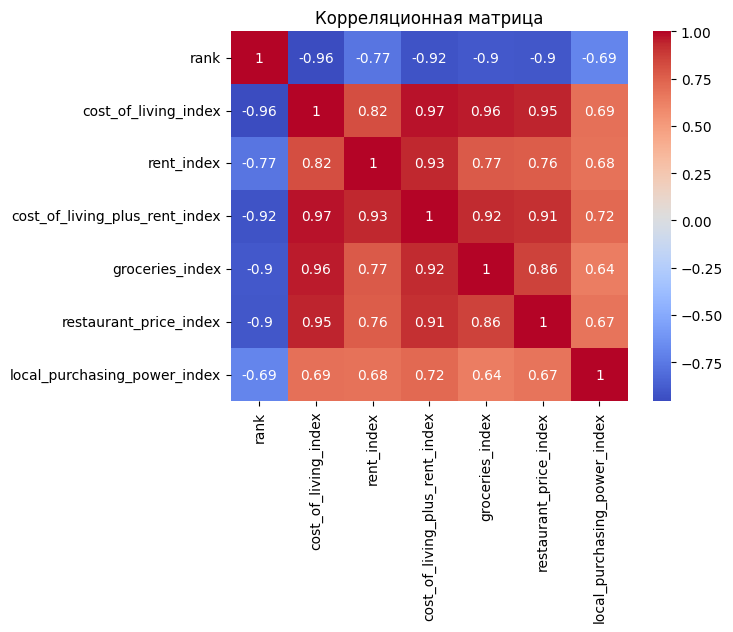

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(db_new.loc[:,['rank','cost_of_living_index','rent_index','cost_of_living_plus_rent_index',
              'groceries_index','restaurant_price_index','local_purchasing_power_index']].corr(), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

Построим гистограммы для нескольких числовых переменных:

График индекса стоимости жизни

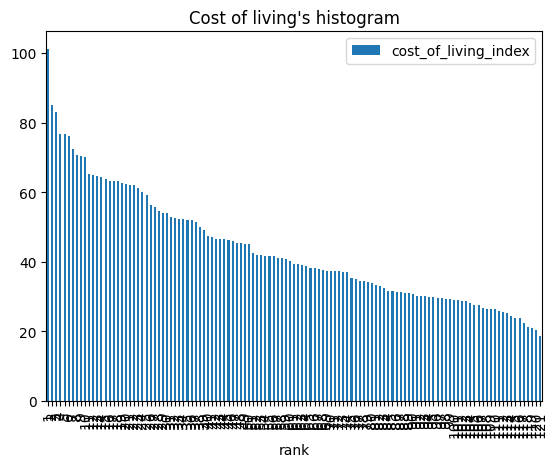

In [ ]:
db_new.plot(x='rank', y='cost_of_living_index', kind='bar')

plt.title("Cost of living's histogram")
plt.show()
# Имеется выброс, есть пик в самом первом ранге, имеет положительную ассиметрию

График индекса арендной платы

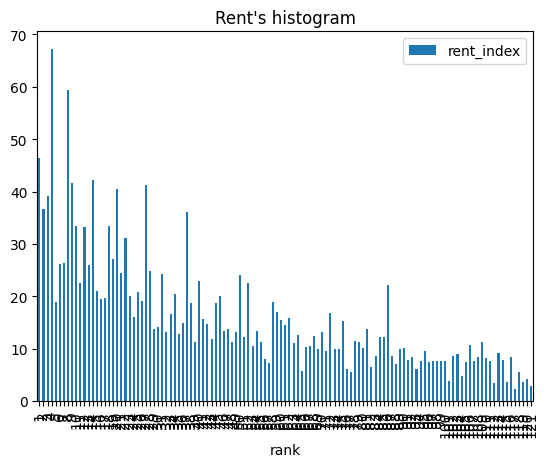

In [ ]:
db_new.plot(x='rank', y='rent_index', kind='bar')

plt.title("Rent's histogram")
plt.show()
# Имеется выбросы после 30, прослеживаются пики в различных рангах, имеет положительную скошенную ассиметрию

График индекса стоимости жизни плюс арендная плата

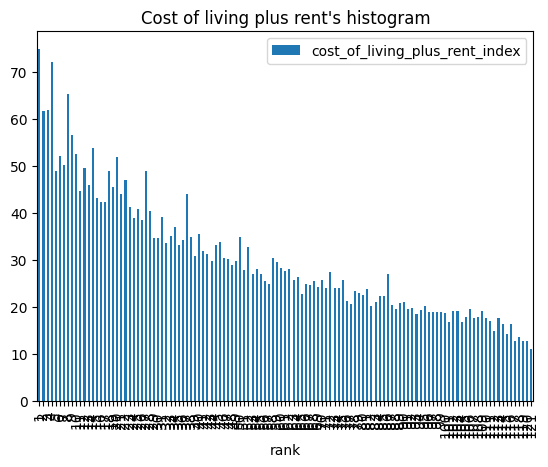

In [ ]:
db_new.plot(x='rank', y='cost_of_living_plus_rent_index', kind='bar')

plt.title("Cost of living plus rent's histogram")
plt.show()
# Имеются выбросы после 60, небольшие пики, положительная ассиметрия

График индекса бакалейных товаров

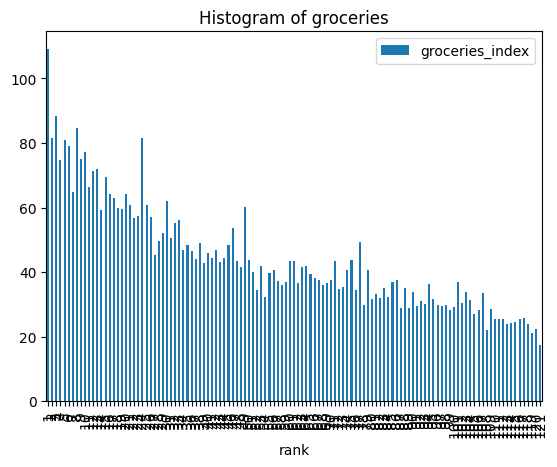

In [ ]:
db_new.plot(x='rank', y='groceries_index', kind='bar')

plt.title("Histogram of groceries")
plt.show()
# Имеются выбросы после 80, небольшие пики, положительная ассиметрия

График индекса цен ресторанов

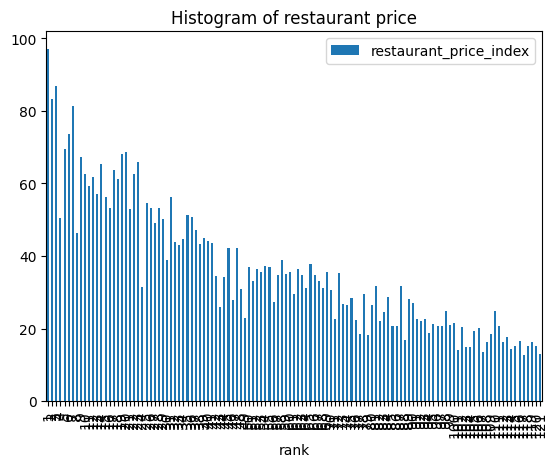

In [ ]:
db_new.plot(x='rank', y='restaurant_price_index', kind='bar')

plt.title("Histogram of restaurant price")
plt.show()
# Имеются выбросы после 80, небольшие пики, положительная ассиметрия

График индекса местной покупательной способности

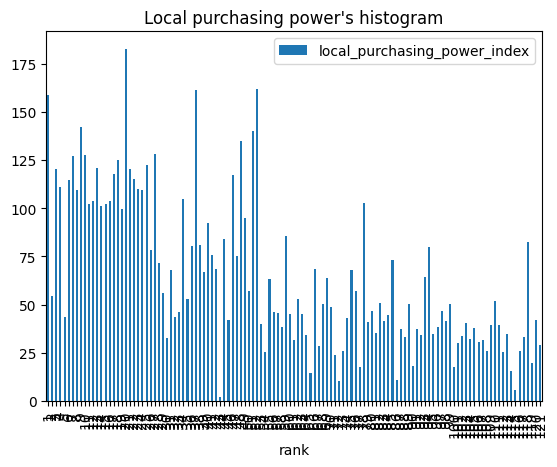

In [ ]:
db_new.plot(x='rank', y='local_purchasing_power_index', kind='bar')

plt.title("Local purchasing power's histogram")
plt.show()
# Отсутствуют выбросы, похоже на распределение с изолированными пиками

Построим таблицы сопряженности:

In [ ]:
pd.crosstab(db_new['cost_of_living_index'],db_new['cost_of_living_plus_rent_index'])

cost_of_living_plus_rent_index,11.1,12.7,12.8,13.7,14.2,15.0,16.4,16.5,16.9,17.1,...,51.9,52.1,52.5,53.8,56.6,61.8,62.0,65.3,72.1,74.9
cost_of_living_index,,,,,,,,,,,,,,,,,,,,,
18.8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20.4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21.0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21.2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22.5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76.6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76.7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
83.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
pd.crosstab(db_new['rent_index'],db_new['cost_of_living_plus_rent_index'])

cost_of_living_plus_rent_index,11.1,12.7,12.8,13.7,14.2,15.0,16.4,16.5,16.9,17.1,...,51.9,52.1,52.5,53.8,56.6,61.8,62.0,65.3,72.1,74.9
rent_index,,,,,,,,,,,,,,,,,,,,,
2.4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.7,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.8,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41.7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
42.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
46.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
pd.crosstab(db_new['groceries_index'],db_new['restaurant_price_index'])

restaurant_price_index,12.8,12.9,13.5,14.0,14.3,14.8,15.0,15.1,15.2,15.3,...,66.0,67.2,68.0,68.7,69.4,73.5,81.3,83.3,86.8,97.0
groceries_index,,,,,,,,,,,,,,,,,,,,,
17.5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22.2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
23.8,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81.4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81.6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
84.6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
pd.crosstab(db_new['cost_of_living_plus_rent_index'],db_new['local_purchasing_power_index'])

local_purchasing_power_index,2.3,5.5,10.5,11.0,14.7,15.6,17.5,17.8,18.4,20.0,...,127.2,127.4,127.9,134.9,139.8,142.3,158.7,161.1,161.8,182.5
cost_of_living_plus_rent_index,,,,,,,,,,,,,,,,,,,,,
11.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12.7,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
12.8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13.7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14.2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61.8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Выполним проверку гипотез при помощи критерия хи-квадрат: "Наблюдения, используемые при расчете таблицы сопряженности, имеют независимый характер". Интерпретация гипотезы:

H0: две выборки независимы.

H1: между выборками есть зависимость.

Анализ независимости индексов стоимости жизни и стоимости жизни плюс арендная плата:

In [ ]:
# the Chi-Squared Test
from scipy.stats import chi2_contingency
table = [db_new['cost_of_living_index'],db_new['cost_of_living_plus_rent_index']]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Две выборки независимы')
else:
	print('Между выборками есть зависимость')


stat=21.435, p=1.000
Две выборки независимы


Анализ независимости индексов арендной платы и стоимости жизни плюс арендная плата:

In [ ]:
# the Chi-Squared Test
from scipy.stats import chi2_contingency
table = [db_new['rent_index'],db_new['cost_of_living_plus_rent_index']]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Две выборки независимы')
else:
	print('Между выборками есть зависимость')

stat=99.481, p=0.914
Две выборки независимы


Анализ независимости индексов бакалейных товаров и ресторанов:

In [ ]:
# the Chi-Squared Test
from scipy.stats import chi2_contingency
table = [db_new['groceries_index'],db_new['restaurant_price_index']]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Две выборки независимы')
else:
	print('Между выборками есть зависимость')

stat=154.557, p=0.018
Между выборками есть зависимость


Анализ независимости индексов стоимости жизни плюс арендная плата и местной покупательной способности:

In [ ]:
# the Chi-Squared Test
from scipy.stats import chi2_contingency
table = [db_new['cost_of_living_plus_rent_index'],db_new['local_purchasing_power_index']]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Две выборки независимы')
else:
	print('Между выборками есть зависимость')

stat=475.578, p=0.000
Между выборками есть зависимость


Построим не менее 3 различных диаграмм – библиотека Matplotlib, 2 различных диаграмм – библиотека Seaborn:

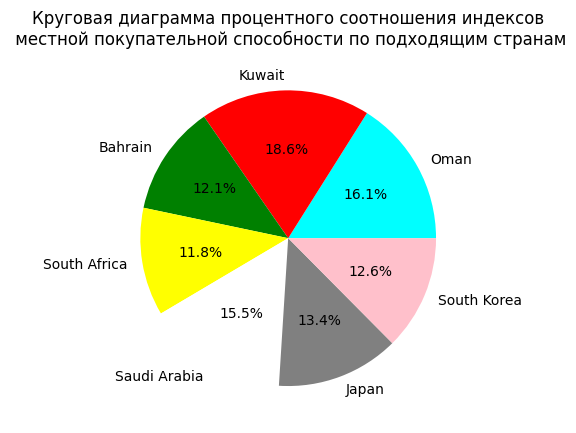

In [ ]:
# подписи подходящих стран
labels = ["Oman", "Kuwait", "Bahrain", "South Africa", "Saudi Arabia", "Japan", "South Korea"]
# процентное соотношение секторов местных покупательных способностей
local_purchasing_powers = [139.8, 161.8, 105.0, 102.8, 134.9, 117.0, 109.4]

# передаём размеры секторов, их названия и цвета, autopct="%1.1f%%" отображает процент внутри каждого сектора
plt.pie(local_purchasing_powers, labels=labels, autopct="%1.1f%%", colors=["cyan", "red", "green", "yellow", "white", "gray", "pink"])
# задаём заголовок графика
plt.title("Круговая диаграмма процентного соотношения индексов\n местной покупательной способности по подходящим странам")
# показываем график
plt.show()

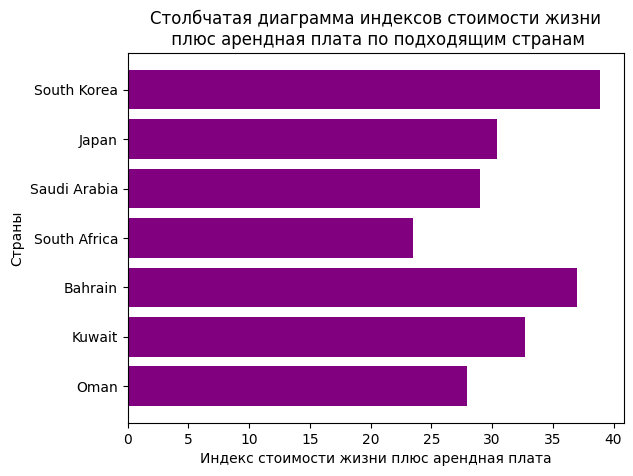

In [ ]:
# значения для каждой категории
cost_of_living_plus_rents = [27.9, 32.7, 37.0, 23.5, 29.0, 30.4, 38.9]

# строим столбчатую диаграмму
plt.barh(labels, cost_of_living_plus_rents, color="purple")
# подписываем ось X
plt.xlabel("Индекс стоимости жизни плюс арендная плата")
# подписываем ось Y
plt.ylabel("Страны")
# задаём заголовок графика
plt.title("Столбчатая диаграмма индексов стоимости жизни\n плюс арендная плата по подходящим странам")
# показываем график
plt.show()

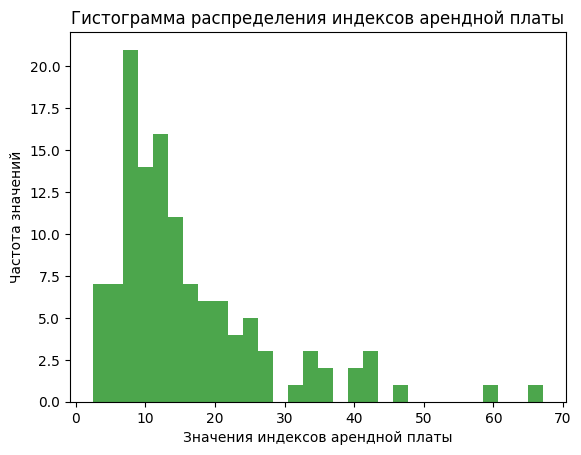

In [ ]:
# создаём гистограмму с 30 интервалами (бинами)
plt.hist(db_new['rent_index'], bins=30, color="green", alpha=0.7)
# подписываем ось X
plt.xlabel("Значения индексов арендной платы")
# подписываем ось Y
plt.ylabel("Частота значений")
# задаём заголовок графика
plt.title("Гистограмма распределения индексов арендной платы")
# показываем график
plt.show()

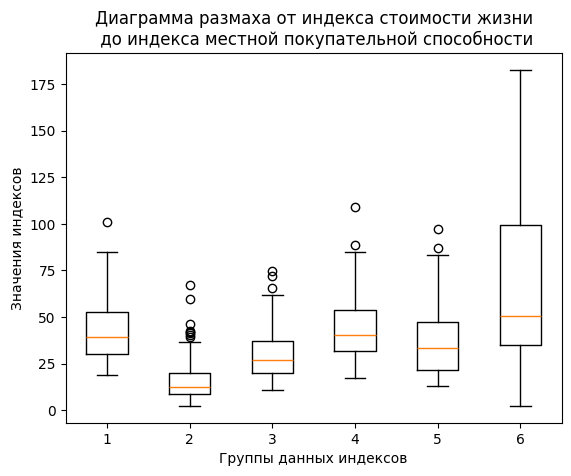

In [ ]:
# cтроим диаграмму размаха
plt.boxplot(db_new.loc[:, 'cost_of_living_index':'local_purchasing_power_index'])
# подписываем ось X
plt.xlabel("Группы данных индексов")
# подписываем ось Y
plt.ylabel("Значения индексов")
# задаём заголовок графика
plt.title("Диаграмма размаха от индекса стоимости жизни\n до индекса местной покупательной способности")
# показываем график
plt.show()

где 1 - индекс стоимости жизни;

2 - индекс арендной платы;

3 - индекс стоимости жизни плюс арендная плата;

4 - индекс бакалейных товаров;

5 - индекс ресторанов;

6 - индекс местной покупательной способности.

/tmp/ipython-input-95-1600882060.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  displot = sns.distplot(db_new['cost_of_living_index'], hist=True, kde=True,


Text(0, 0.5, 'Частота значений')

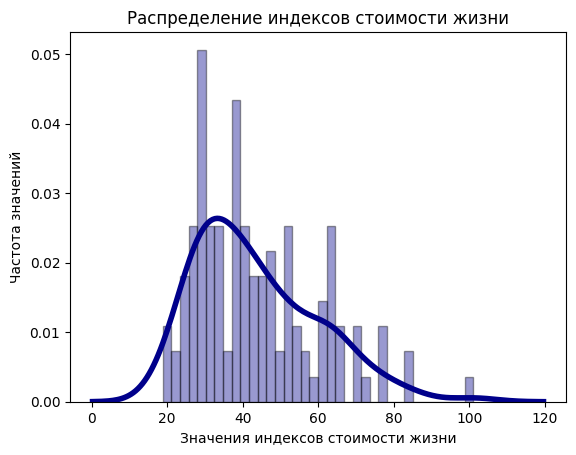

In [ ]:
displot = sns.distplot(db_new['cost_of_living_index'], hist=True, kde=True,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
displot.set_title("Распределение индексов стоимости жизни")
displot.set_xlabel("Значения индексов стоимости жизни")
displot.set_ylabel("Частота значений")

Text(0, 0.5, 'Индекс местной покупательной способности')

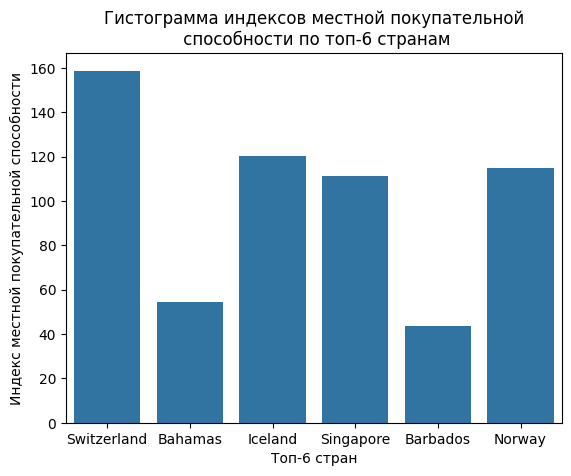

In [ ]:
barplot = sns.barplot(x=db_new['country'].head(6), y='local_purchasing_power_index', data=db_new)
barplot.set_title("Гистограмма индексов местной покупательной\n способности по топ-6 странам")
barplot.set_xlabel("Топ-6 стран")
barplot.set_ylabel("Индекс местной покупательной способности")